# Homework 2

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# # for downloading data using wget
# import wget
# data = wget.download('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')
# df = pd.read_csv(data)

## Dataset

In [16]:
df = pd.read_csv('housing.csv')
len(df)

20640

In [19]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [24]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

## Exploratory data analysis

Look at the median_house_value variable. Does it have a long tail?

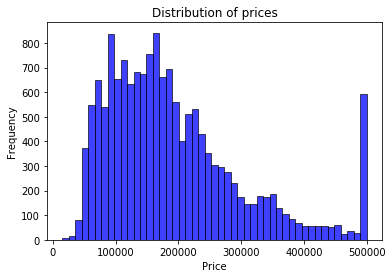

In [27]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, color='blue')
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

## Preparing the dataset

For this homework, we only want to use a subset of data.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

In [28]:
df = df[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')]
df.ocean_proximity.unique()

array(['<1H OCEAN', 'INLAND'], dtype=object)

In [32]:
df = df[
    ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
     'population', 'households', 'median_income', 'median_house_value']]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [7]:
# df.columns = df.columns.str.lower().str.replace(' ', '_')

# string_columns = list(df.dtypes[df.dtypes == 'object'].index)

# for col in string_columns:
#     df[col] = df[col].str.lower().str.replace(' ', '_')

In [30]:
# log_price = np.log1p(df.median_house_value)

# plt.figure(figsize=(6, 4))

# sns.histplot(log_price, bins=40, color='blue')
# plt.ylabel('Frequency')
# plt.xlabel('Log(Price + 1)')
# plt.title('Distribution of prices after log tranformation')

# plt.show()

## Question 1

There's one feature with missing values. What is it?

In [34]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Answer: total_bedrooms

## Question 2

What's the median (50% percentile) for variable 'population'?

In [35]:
df['population'].median()

1195.0

Answer: 1195

## Prepare and split the dataset

In [37]:
# Shuffle the dataset (the filtered one you created above), use seed 42.

np.random.seed(42)
n = len(df)
idx = np.arange(n)
np.random.shuffle(idx)

# Split your data in train/val/test sets, with 60%/20%/20% distribution.

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [38]:
# Apply the log transformation to the median_house_value variable using the np.log1p() function.

y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Question 3

### Linear Regression

In [39]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

### Baseline solution (fill NAs with 0)

In [40]:
def prepare_X_zeros(dframe):
    dframe = dframe.fillna(0)
    X = dframe.values
    return X

In [41]:
X_train_zeros = prepare_X_zeros(df_train)
w_0_zeros, w_zeros = train_linear_regression(X_train_zeros, y_train)

In [42]:
y_pred_zeros = w_0_zeros + X_train_zeros.dot(w_zeros)

In [43]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [44]:
rmse(y_train, y_pred_zeros)

0.34027197158295336

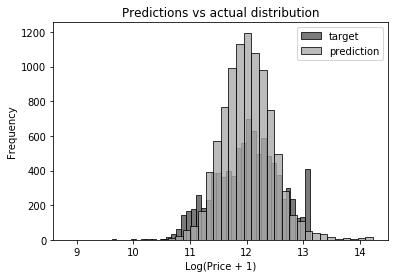

In [45]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_zeros, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

### Baseline solution (fill NAs with means)

In [46]:
def prepare_X_means(dframe):
    dframe = dframe.fillna(df_train.mean())
    X = dframe.values
    return X

In [47]:
X_train_means = prepare_X_means(df_train)
w_0_means, w_means = train_linear_regression(X_train_means, y_train)

In [48]:
y_pred_means = w_0_means + X_train_means.dot(w_means)

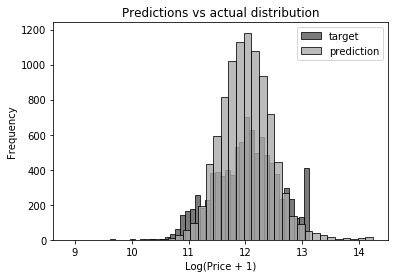

In [49]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_means, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

### Comparing RMSEs

In [50]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return round(np.sqrt(mse), 2)

In [51]:
rmse(y_train, y_pred_zeros)

0.34

In [52]:
rmse(y_train, y_pred_means)

0.34

In [53]:
X_val = prepare_X_zeros(df_val)
y_pred = w_0_zeros + X_val.dot(w_zeros)

In [54]:
rmse(y_val, y_pred)

0.34

## Question 4

In [56]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [57]:
X_train = prepare_X_zeros(df_train)
X_val = prepare_X_zeros(df_val)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

     0 0.34
 1e-06 0.34
0.0001 0.34
 0.001 0.34
  0.01 0.34
   0.1 0.34
     1 0.34
     5 0.35
    10 0.35


In [58]:
X_train = prepare_X_zeros(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X_zeros(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X_zeros(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.34
test: 0.33


## Question 5

In [60]:
rmses = np.array([])
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(i)

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    def train_linear_regression(X, y):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])

        XTX = X.T.dot(X)
        XTX_inv = np.linalg.inv(XTX)
        w = XTX_inv.dot(X.T).dot(y)

        return w[0], w[1:]

    # def prepare_X_zeros(dframe):
    #     dframe = dframe.fillna(0)
    #     X = dframe.values
    #     return X

    X_train_zeros = prepare_X_zeros(df_train)
    w_0_zeros, w_zeros = train_linear_regression(X_train_zeros, y_train)

    #y_pred_zeros = w_0_zeros + X_train_zeros.dot(w_zeros)

    # def rmse(y, y_pred):
    #     error = y_pred - y
    #     mse = (error ** 2).mean()
    #     return round(np.sqrt(mse), 2)

    #print(rmses)
    X_val = prepare_X_zeros(df_val)
    y_pred = w_0_zeros + X_val.dot(w_zeros)
    rmse_score = rmse(y_val, y_pred)
    rmses = np.append(rmses, rmse_score)
    print(rmse_score)
print()
print(round(np.std(rmses), 3))

0.34
0.34
0.34
0.33
0.34
0.34
0.34
0.35
0.35
0.33

0.006


## Question 6

In [61]:
np.random.seed(9)

n = len(df)

n_test = int(0.2 * n)
n_train = n - n_test

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_test = df_shuffled.iloc[n_train:].copy()

y_train_orig = df_train.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_test['median_house_value']

In [62]:
X_train = prepare_X_zeros(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_test = prepare_X_zeros(df_test)
y_pred = w_0 + X_test.dot(w)
print('test', rmse(y_test, y_pred))

train 0.35
test 0.34
